<a href="https://colab.research.google.com/github/magistery-tps/dm-cyt-tp2/blob/main/notebooks/create_graph.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

####  Referencias

* [Pandas pipelines](https://calmcode.io/pandas-pipe/end.html)
* [Python logger](https://www.youtube.com/watch?v=g8nQ90Hk328&list=PLi01XoE8jYohWFPpC17Z-wWhPOSuh8Er-&index=17)
* [Dataset](https://smallworldofwords.org/en/project/research)
* [Glove word embedding](https://nlp.stanford.edu/projects/glove/)
* [Elmo word embedding](https://allennlp.org/elmo)
* [Basics of Using Pre-trained GloVe Vectors in Python](https://medium.com/analytics-vidhya/basics-of-using-pre-trained-glove-vectors-in-python-d38905f356db)

In [2]:
from IPython.display import clear_output
import sys
import os.path
from os import path

def is_runing_into_colab_env():
    try:
        import google.colab
        return True
    except:
        return False

### 1. Instalacion de paquetes

Bajo paquete para trabajar con EEG- Me permite ver la topografía

In [3]:
if is_runing_into_colab_env(): 
    !pip install rich

     |████████████████████████████████| 212 kB 40.4 MB/s 
     |████████████████████████████████| 51 kB 8.0 MB/s 


In [ ]:
%matplotlib inline
%load_ext autoreload
%load_ext rich
%autoreload 2

###  2. Descargar dataset

Se descarga el dataset y lo descomprime en `~/datasets`.

In [5]:
dataset_filename = "strength.SWOW-EN.R1.csv"
embeding_filename = "glove.840B.300d"
embeding_filename_txt = embeding_filename + '.txt'

dataset_url  = 'https://raw.githubusercontent.com/magistery-tps/dm-cyt-tp2/main/datasets/{}.zip'.format(dataset_filename)
embeding_url = 'https://nlp.stanford.edu/data/{}.zip'.format(embeding_filename)

if is_runing_into_colab_env():
    !cd ~
    !rm -rf datasets
    !rm -rf *.zip
    !wget  {dataset_url}
    !wget  {embeding_url}
    !unzip {dataset_filename}.zip
    !unzip {embeding_filename}.zip
    !mkdir datasets
    !mv {dataset_filename} datasets
    !mv {embeding_filename}.txt datasets
    !rm *.zip

--2021-10-31 20:38:24--  https://raw.githubusercontent.com/magistery-tps/dm-cyt-tp2/main/datasets/strength.SWOW-EN.R1.csv.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 3011517 (2.9M) [application/zip]
Saving to: ‘strength.SWOW-EN.R1.csv.zip’

strength.SWOW-EN.R1 100%[===================>]   2.87M  --.-KB/s    in 0.02s   

2021-10-31 20:38:24 (149 MB/s) - ‘strength.SWOW-EN.R1.csv.zip’ saved [3011517/3011517]

--2021-10-31 20:38:24--  https://nlp.stanford.edu/data/glove.840B.300d.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.cs.stanford.edu/nlp/data/glove.840B.300d

###  3. Importa libreria del proyecto

In [6]:
if is_runing_into_colab_env():
    if path.exists('/content/dm-cyt-tp2'):
        print('Pull...\n')
        !cd dm-cyt-tp2; git pull origin main
    else:
        print('Clone...\n')
        !git clone https://github.com/magistery-tps/dm-cyt-tp2.git

Clone...

Cloning into 'dm-cyt-tp2'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (50/50), done.
remote: Total 70 (delta 25), reused 47 (delta 10), pack-reused 0
Unpacking objects: 100% (70/70), done.


In [12]:
sys.path.append('/content/dm-cyt-tp2/src' if is_runing_into_colab_env() else '../src')
dataset_path = '/content/datasets/{}' if is_runing_into_colab_env() else '../datasets/{}'

###  4. Importa paquetes externos

In [13]:
import numpy as np
import pandas as pd

import logging
from logger import setup_logger

from scipy.spatial.distance import euclidean, jaccard, cosine
from distance import closest, show_closest

from transform_step import  select_columns, \
                            rename_columns, \
                            filter_bidiredtional_associations, \
                            filter_words_lt, \
                            filter_stopwords, \
                            to_unique_works, \
                            to_work_embeddings, \
                            dropna

from output_step import plot_frequency, \
                        log_unique_words, \
                        log_source_into_response_and_vise_versa

In [14]:
setup_logger(format = '%(levelname)s: %(message)s')

###  5. Preprocesar dataset

In [16]:
def dataset(filename): return pd.read_csv(dataset_path.format(filename), sep='\t')

INFO: (483636, 5) --> select_columns({}) --> (483636, 2)
INFO: (483636, 2) --> rename_columns({}) --> (483636, 2)
INFO: Unique - Source: 12217, Response: 64630
INFO: NumExpr defaulting to 2 threads.
INFO: Unique: True, Source into response: 387323, Response into source: 482350
INFO: Unique: False, Source into response: 96313, Response into source: 1286
INFO: (483636, 2) --> filter_words_lt({'size_less_than': 2}) --> (482247, 2)
INFO: (482247, 2) --> dropna({}) --> (482200, 2)
INFO: (482200, 2) --> filter_bidiredtional_associations({}) --> (385335, 2)
INFO: (385335, 2) --> filter_stopwords({'languages': ['arabic']}) --> (385335, 2)
INFO: (385335, 2) --> filter_stopwords({'languages': ['azerbaijani']}) --> (385159, 2)
INFO: (385159, 2) --> filter_stopwords({'languages': ['bengali']}) --> (385159, 2)
INFO: (385159, 2) --> filter_stopwords({'languages': ['danish']}) --> (384650, 2)
INFO: (384650, 2) --> filter_stopwords({'languages': ['dutch']}) --> (384327, 2)
INFO: (384327, 2) --> filter

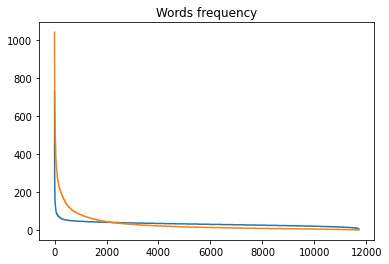

In [17]:
output = \
    dataset(dataset_filename) \
    .pipe(select_columns) \
    .pipe(rename_columns) \
    .pipe(log_unique_words) \
    .pipe(log_source_into_response_and_vise_versa, unique=True) \
    .pipe(log_source_into_response_and_vise_versa, unique=False) \
    .pipe(filter_words_lt, size_less_than=2) \
    .pipe(dropna) \
    .pipe(filter_bidiredtional_associations) \
    .pipe(filter_stopwords, column = 'source') \
    .pipe(filter_stopwords, column = 'response') \
    .pipe(plot_frequency, column = 'source') \
    .pipe(plot_frequency, column = 'response')

In [18]:
work_embeddings = output \
    .pipe(to_unique_works) \
    .pipe(to_work_embeddings, file_path = dataset_path.format(embeding_filename_txt))

INFO: (366163, 2) --> to_unique_works({}) --> (366158, 1)


  0%|          | 0/366158 [00:00<?, ?it/s]

INFO: Found 5328 words.
INFO: (366158, 1) --> to_work_embeddings({'file_path': '/content/datasets/glove.840B.300d.txt'}) --> 5328


In [19]:
any_word = list(work_embeddings.keys())[10]

show_closest(work_embeddings, any_word, cosine)
show_closest(work_embeddings, any_word, euclidean)
show_closest(work_embeddings, any_word, jaccard)

- distance: cosine
- Word: alternative
- Closest: ['preferable', 'affordable', 'straightforward', 'mainstream', 'sustainable', 'regardless', 'marketplace', 'framework', 'guidelines']

- distance: euclidean
- Word: alternative
- Closest: ['preferable', 'straightforward', 'regardless', 'affordable', 'mainstream', 'mainstay', 'drawback', 'forefront', 'alongside']

- distance: jaccard
- Word: alternative
- Closest: ['jetliner', 'dealbreaker', 'goldeneye', 'shipmate', 'penknife', 'masterbedroom', 'stairstep', 'serverfarm', 'website']

